This Jupyter notebook is a property of the University of California and copyrighted by Dipak Ghosal. Only personal use for ECS 132 and ECS 256 classes is allowed. Uploading this to any shared site is a violation of the University of California copyright laws

# A Project on Covert Timing Channels

## Instructions

    1. You may in no circumstances upload this project to private tutoring websites such as CourseHero or Chegg. Remember all material related to this course  is a property of the University of California and posting them is a violation of the copyright laws and will lead to serious consequences. 
    
    2. In doing this project if you refer to a source (either a book or the internet), you must cite it.
    
    3. You are highly urged to work on this project on your own.  If you do discuss with others,  you must list their names. 
    
    4. This Jupyter Notebook requires Python 3 ipykernel. You  must write your code in Python 3. Make sure to run this notebook under the Python kernel.

## 1. Introduction
The goal of this project is to learn about how to design, detect, and implement a covert timing channel using a stream of packets generated by an application.  We will do this project in steps. At this point we will get started with the first simple step. 

## 2. Background

Covert communication is method of exchanging secret messages in which the communication is hidden. A related term is steganography which  deals with methods  to write/embed hidden messages in such a way that no one, other than the sender and the intended receiver, know the existence of the message. The word steganography is of Greek origin and means "concealed writing" from the Greek words steganos meaning "covered or protected", and graphei meaning "writing" [From Wikipedia]. Steganography and covert channels have a long history and was used  in WWII to send secret messages to spies behind enemy lines. In the computer and network security, covert channels and steganography  fall in the broad category of security through obscurity.

The advantage of a covert channel over cryptography is that messages do not attract attention to themselves. Plainly visible encrypted messages — no matter how unbreakable — will arouse suspicion. The very presence of encrypted messages may be incriminating in countries where encryption is illegal. In such cases the communication channel must itself be hidden and this is achieved using covert channels / steganography. Note that, cryptography protects the contents of a message. Covert communication on the other hand protects both the message and the communicating parties.

Typically, steganography refers to the concealment of information within a document file, image file, or program. Media files are ideal for steganographic transmission because of their large size. As a simple example, a sender might start with an innocuous image file and adjust the color of every 100th pixel to correspond to a letter in the alphabet. The overall change is so small  that someone not specifically looking for it is unlikely to notice it. Another method is called the Least Significant Bit (LSB) substitution. In this method, the least significant bit of each  pixel in a digital image is modified by the bits  of the secret message. Since the LSB contributes very little to the overall (intensity/color/brightness) of each pixel, the change in the image will be imperceptible to the naked eye.

Covert channels are communication channels that are established over some overt medium. For example, we can uses a stream of network packets (for example stream of packets generated by a Skype call) as the overt carrier for a covert communication channel. As usual, we have our three characters Alice, Bob, and Eve. Alice and Bob are in a repressive country where all communication is monitored and they want to establish a covert channel to exchange secret messages. Eve is a warden who can look at all network packets and try to detect if any covert communication is being used to plan a uprising against the repressive state.

To setup a covert communication channel, Alice and Bob first initiate an overt application let say a (computer to computer) Skype call and they start a regular innocuous conversation. Their interactive conversation produces a stream of IP packets from Alice to Bob and Bob to Alice.  For the time being let us only consider covert channel in one direction from Alice to Bob and hence only consider the IP packets stream from Alice to Bob. There are two ways in which Alice can send a secret message. She can replace some unused bits in the protocol header with the bits of the covert message. This is called a **covert storage channel**. These types of channels are easily detectable since the protocol header fields that are not used are well known to Eve and she can check bits to detect the covert channel, identify Alice and Bob and the covert message. The other method that Alice can uses is to alter the inter-packet delays of the IP packet using a pre-established shared key to modulate the bits of the secret message. This is called a **covert timing channel** and will be the focus of our study.  

## 3. A Concrete Example

To make things more concrete lets consider a concrete example. For simplicity, we will assume that Alice has buffered a large number of the IP packets that she has generated (as a result of her talking). This is obviously not realistic [why?] but for this first step let's make this assumption. Each packet has two attributes 1) a sequence number and 2) the time when the packet was generated. Thus, P(n, tn) denotes packet n which was generated at time tn. We will assume that the first packet is numbered 1 and is generated at  time 0, i.e.,  t1 = 0. Note that the time field gives the cumulative time. To obtain the inter-packet delay, we can take the time difference between the consecutive packets.  This packet stream is the unmodified overt traffic.
Alice and Bob have a priori decided that an inter-packet delay of 0.5 will  be used to code 1 and an inter-packet delay of 0.1 will be used to code a 0. So if Alice wants to send the alphabet “b” (which isd 0110 0010) she will generate the following sequence of packets P(1, T0), P(2, T1=T0+0.1), P(3, T2=T1+0.5), P(3, T3 = T2+0.1), P(4, T4 = T3+0.1) for the first 4 bits starting from the LSB.  This  is shown in the Figure below. 

<figure> 
    <img src="Figures/Timing-Channel-Example.jpg" width="800" height="600">
    <figcaption align = "center"><b>Figure - A very simplistic timing channel </b></figcaption>
</figure>


If the timing between the packets are not altered by the network or by Eve, then Bob can observe  the inter-packet delays, translate them to binary  bits and then determine the corresponding character.  In this assignment, we will try to design a method of modulating the bits into inter-packet delays such that Eve is not able to discover the channel. We will assume that the network or Eve will not modify the inter-packet delays.

## 4.  A First Simple Design

Alice ad Bob are having a Skype call. When Alice talks, the Skype application generates packets. This is called the **overt packet stream**. In her computer Alice has created a packet buffer (in memory)  which holds a bunch of packets (as many as required to send the secret message) and then a using aspecially designed packet scheduler releases the packet with interpacket delays that encode the secret message.  The overall system in Alice's computer is shown in the Figure below.  In this part of the project we  will consider a few simple scheme for encoding a secret message in the inter-packet delays. 

<figure> 
    <img src="Figures/Timing-Channel-Alice.jpg" width="800" height="600">
    <figcaption align = "center"><b>Figure showing the setup in Alice's computer. The overt stream of packets is generated by the Skype application. The inter-packet delays has some (given)  random distribution. The covert packet stream is generated by the packet scheduler. The inter-packet delays are chosen suh that they encode the secret message.  </b></figcaption>
</figure>



### 4.1 Secret Message 

The secret message that Alice wants to send to Bob  is \``this is a secret message\''  The characters are encoded using 8 bits ASCII. Write a code to convert  the secret message into a sequence of bits. Include the spaces as well. You can use the bin and ord  functions as shown below.  

In [1]:
!pip install simpy
!pip install pandas
!pip install matplotlib

In [2]:
bin(ord("t"))

'0b1110100'

You can remove the 'b' 

In [3]:
bin(ord("t")).replace('b','')

'01110100'

Include the code that generates the bit sequence in a file named "secret_message_bits"

In [4]:
# First, create function to create the secret msg given a msg and a file path
from pathlib import Path
def create_secret_msg(msg: str, encoded_msg_path: Path) -> None:
    """Creates a secret msg in bits using a given msg in standard English alphabet and file path to store encoded msg"""
    with open(encoded_msg_path, "w") as f:
        for ch in msg:
            f.write(bin(ord(ch)).replace("b", ""))

In [5]:
# Now, create the encoded msg
secret_msg = "This is a secret message"
secret_msg_fp = Path("Proj_Files/secret_message_bits.txt")
create_secret_msg(msg=secret_msg, encoded_msg_path=secret_msg_fp)

### 4.2 Obtaining the Baseline

Alice has buffered a sequence of packets that was generated by Skype. This is given in a excel file.  This called the overt packet stream. Write a Python code to plot the histogram of the **inter-packet delays** of the overt packet stream.  This is the baseline. This statistical characteristic of the packet stream is known to Eve and she will use this to see if any given packet stream between Alice and Bob is suspicious. In Section 7 (Detection) we will learn of techniquess of how  Eve will actually do this. 

Include the code that generates the histogram

In [6]:
from pathlib import Path
import pandas as pd

def add_overt_ipds(file_path: Path) -> pd.DataFrame:
    """Adds general IPD for packets that Alice sends"""
    traffic_data = pd.read_csv(file_path) # Read CSV File as dataframe
    traffic_data["Inter-Packet Delay"] = traffic_data["Time"].diff().round(decimals=2) # Take the cumulative diff for each row
    traffic_data["Inter-Packet Delay"] = traffic_data["Inter-Packet Delay"].fillna(0) # First row indicates T_0
    return traffic_data

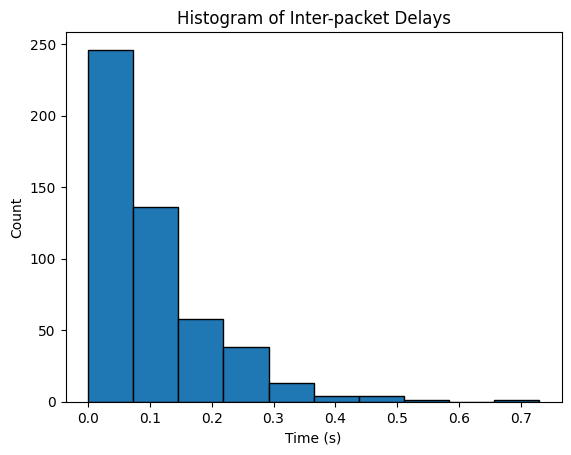

In [7]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

file_path = Path("Data/Traffic_data_orig.csv")
traffic_data = add_overt_ipds(file_path)
plt.hist(traffic_data["Inter-Packet Delay"], edgecolor="black")
plt.title("Histogram of Inter-packet Delays")
plt.xlabel("Time (s)")
plt.ylabel("Count")
proj_files_dir = Path("Proj_Files/")
if not proj_files_dir.exists():
    proj_files_dir.mkdir()
img_path = proj_files_dir / "baseline_ipd_hist.jpeg"
plt.savefig(img_path)

Include the histogram (jpeg or pdf). You run the above code. Save the histogram as a pdf of jpeg file and then load it here. 

(-0.5, 639.5, 479.5, -0.5)

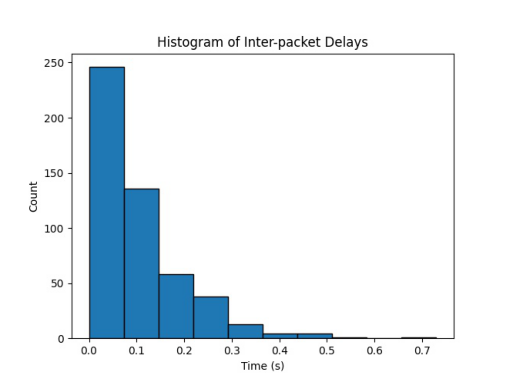

In [8]:
from matplotlib import image as mpimg
# # Reading the image from file
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis("off")

### 4.3 A Simple Modulation Scheme

Alice and Bob decide to use the following modulation scheme to map the bits to the inter-packet delay. A delay of 0.25 is used to encode a bit 0 and delay of 0.75 is used to encode a bit 1. Write a Python code  that will generate the modified packet stream that contains the secret message. Note  that you will not need all the packets that you are given. 

In [9]:
# First we read the contents of the secret message file (which was converted to binary)
from pathlib import Path
from typing import List
def create_simple_mod_scheme(encoded_msg_fp: Path) -> List[float]:
    """Generate simple modulation scheme from encoded msg"""
    with open(encoded_msg_fp, "r") as encoded_msg_file:
        covert_stream_time = [0]
        encoded_msg = encoded_msg_file.read()
        # print(encoded_msg)
        for i in range(len(encoded_msg)):
            if encoded_msg[i] == "0":
                covert_stream_time.append(covert_stream_time[i] + 0.25)
            else:
                covert_stream_time.append(covert_stream_time[i] + 0.75)
    ip_delays_basic_method = [0]
    for i in range(1, len(covert_stream_time)):
        ip_delays_basic_method.append(covert_stream_time[i] - covert_stream_time[i - 1])
    return ip_delays_basic_method

### 4.4 Histogram of Inter-packet Delays

Plot the histogram of the inter-packet delay of the covert packet stream. Plot the histogram for  the part of the packet stream that you need to encode the secret message.  Will Eve be suspicious?

Include the histogram (jpeg or pdf). 

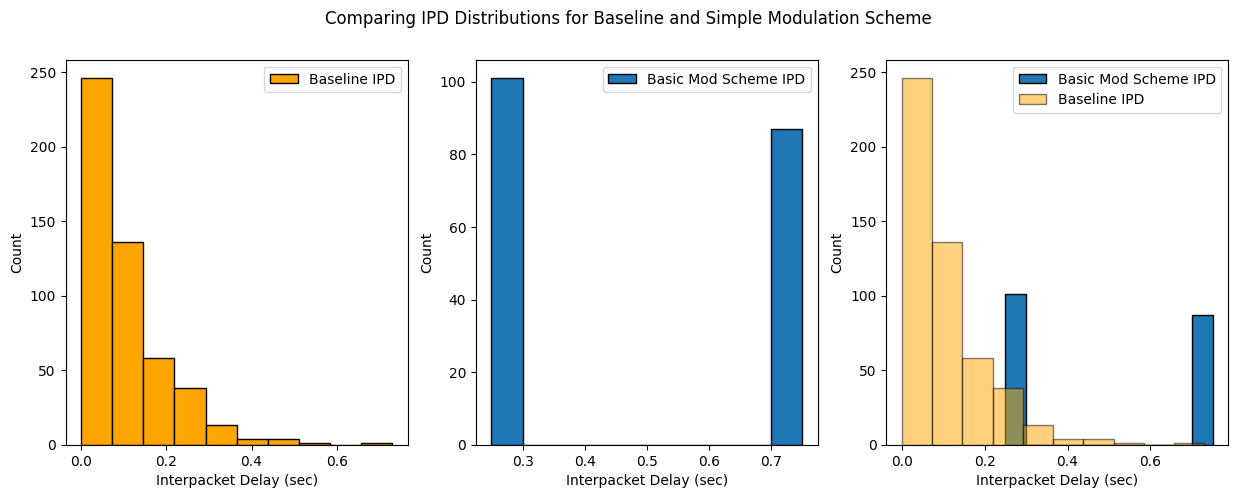

In [10]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Comparing IPD Distributions for Baseline and Simple Modulation Scheme")
ip_delays_basic_method = create_simple_mod_scheme(encoded_msg_fp=secret_msg_fp)
axs[0].hist(traffic_data["Inter-Packet Delay"], edgecolor="black", label="Baseline IPD", color="orange")
axs[1].hist(ip_delays_basic_method[1:], edgecolor="black", label="Basic Mod Scheme IPD")
axs[2].hist(ip_delays_basic_method[1:], edgecolor="black", label="Basic Mod Scheme IPD")
axs[2].hist(traffic_data["Inter-Packet Delay"], edgecolor="black", label="Baseline IPD", color="orange", alpha=0.5)
for ax in axs:
    ax.set_xlabel("Interpacket Delay (sec)")
    ax.set_ylabel("Count")
    ax.legend()
plt.savefig(proj_files_dir / "baseline_mod_scheme.jpeg")

![Alt Text](Proj_Files/baseline_mod_scheme.jpeg)

### 4.5  A Better Modulation Scheme

Alice and Bob decide to use the following modulation scheme. Let $m$, $\min$, and $\max$ denote the median, min, and max of the inter-packet delay of the overt packet stream. If Alice needs to send a 0 she randomly generates a delay between $m$ and $\min$. If she want to send a 1 she randomly generates a delay between $m$ and $\max$. First, compute $m$, $\min$, and $\max$ of the overt packet stream. Next, modify the code  in  4.3, to generate  the covert  packet stream that contains  the secret message.

### 4.6 Histogram of Inter-packet Delays

Plot the histogram  of the inter-packet  delays of the overt packet stream and that of the new covert packet stream. Again, plot the histogram of the part of the packet stream that you need to encode the secret message. Do you think Eve will be suspicious?

Include the code that generates the histogram

In [11]:
from pathlib import Path
import numpy as np
import random
import pandas as pd

def create_better_mod_scheme(file_path: Path, encoded_msg_path: Path):
    traffic_data = add_overt_ipds(file_path)
    median, minimum, maximum = np.median(traffic_data["Inter-Packet Delay"]), min(traffic_data["Inter-Packet Delay"]), max(traffic_data["Inter-Packet Delay"])
    with open(encoded_msg_path, "r") as encoded_msg_file:
        covert_stream_time = [0]
        encoded_msg = encoded_msg_file.read()
        for i in range(len(encoded_msg)): # For each char, generate a corresponding delay
            if encoded_msg[i] == "0":
                covert_stream_time.append(covert_stream_time[i] + random.uniform(minimum, median))
            else:
                covert_stream_time.append(covert_stream_time[i] + random.uniform(median, maximum))
    ip_delays_new_method = [0]
    for i in range(1, len(covert_stream_time)):
        ip_delays_new_method.append(covert_stream_time[i] - covert_stream_time[i - 1])
    return np.array(ip_delays_new_method)

Include the histogram (jpeg or pdf). 

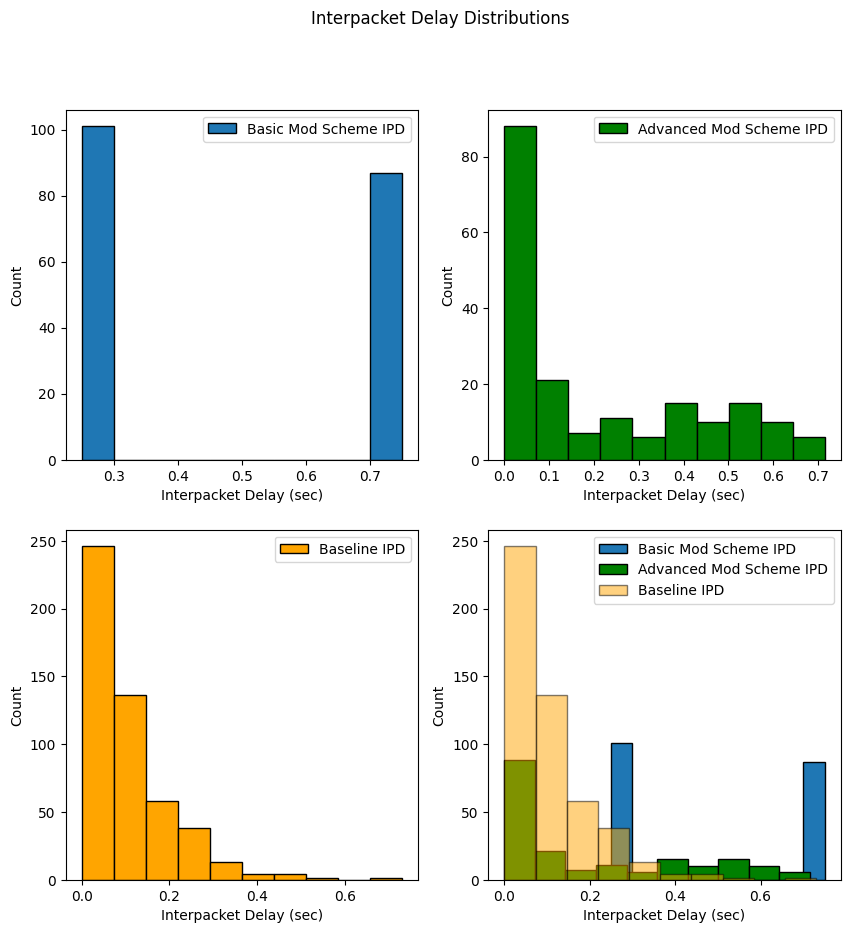

In [12]:
# Include the code that generates the histogram
from matplotlib import pyplot as plt

file_path = Path("Data/Traffic_data_orig.csv")
traffic_data = add_overt_ipds(file_path)
ip_delays_new_method = create_better_mod_scheme(file_path, secret_msg_fp) 

relevant_traffic_data = traffic_data[(traffic_data["Inter-Packet Delay"] == 0.25) | 
                                  (traffic_data["Inter-Packet Delay"] == 0.75)]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(ip_delays_basic_method[1:], edgecolor="black", label="Basic Mod Scheme IPD")
axs[0, 1].hist(ip_delays_new_method, edgecolor="black", label="Advanced Mod Scheme IPD", color="green")
axs[1, 0].hist(traffic_data["Inter-Packet Delay"], edgecolor="black", label="Baseline IPD", color="orange")
axs[1, 1].hist(ip_delays_basic_method[1:], edgecolor="black", label="Basic Mod Scheme IPD")
axs[1, 1].hist(ip_delays_new_method, edgecolor="black", label="Advanced Mod Scheme IPD", color="green")
axs[1, 1].hist(traffic_data["Inter-Packet Delay"], edgecolor="black", label="Baseline IPD", color="orange", alpha=0.5)
for ax_lst in axs:
    for ax in ax_lst:
        ax.set_xlabel("Interpacket Delay (sec)")
        ax.set_ylabel("Count")
        ax.legend()
fig.suptitle("Interpacket Delay Distributions")
# plt.legend()
plt.savefig(proj_files_dir / "ipd_inter_packet_delays.jpeg")

![Alt Text](Proj_Files/ipd_inter_packet_delays.jpeg)

### 4.7  Answer the following questions.

      1. How can you improve upon the method in 4.5?
      
      2. We assumed the Alice will buffer up the packets and we mentioned that it was unrealistic. Why?
      
      3. We have assumed that the network does not alter the inter-packet delays. What would be the problem if it did? Can you suggest methods to mitigate the effect of the changes of the inter-packet delay (noise)?

1. To improve upon the method in 4.5, I can try to think of using metrics that will follow the similar exponential distribution pattern as the baseline IPD. In particular, when the bit is 0, the updated modulation scheme prompots Alice to send out packets faster than the baseline IPD. So, I can focus on this region (by looking at the plot above, it is between $0-0.3$).
2. This is unrealistic because if she buffers the packets, the communication between Alice and Bob will be extremely garbled. Voice data is extremely time-sensitive and it is important that the voice packets be sent to Bob at a similar frequency like when Alice sent it so it is cohesive.
3. If the network altered the inter-packet delays, there may be instances where Bob incorrectly deciphers a secret message bit, when it was in fact just noise. Some methods to mitigate the effect of the changes of the inter-packet delay could be to ensure that the WiFi connection between both Alice and Bob are in optimal conditions. Additionally, we can check to see if there are any devices that may be affecting the transmission time from Alice to Bob, and making sure that those devices are not obstructing the path between Alice and Bob. Also, in order to mitigate the noise, we can have the inter-packet delays more spread out, so that it would be easier to differentiate between what represents a 0 or 1, even with noise. If the delays are close together, then noise can have a greater effect in garbling the 0s and 1s.

## 5. A Real Implementation

In this section, we make the implementation more realistics and address some engineering issues.  

### 5.1 Overview

In the previous part, we assumed that Alice buffers as many packets she requires to transmit the secret message. For eaxmple, if the secret message is 32 bits then Alice will buffer 33 packets and release the packets with appropriate delays based on the encoding scheme to encode the secret message. If the secret message is small, this will work as Alice needs to buffer a small number of packets. However, this will not work if the secret message is long as this will require Alice to buffer large number of packets and this is unealistic (you have found and written good reasons in answering the related question in 4.7 above). 


We will denote $m$ to be the size of the secret message. Also let $B$ denote the maximum number of packets that can be buffered at anytime. The issue of having a large $B$ is that packets that are at the end of the buffer  must wait for all the packets that in the front to be transmitted. This may cause unacceptable delays for the packets. The value of $B$ will be determined by the overt application that ALice is using. For example, for real-time application (such as Augmented Reality/Virtual Reality applications) $B$ will be small whereas for Email application $B$ can be large.   In this study we will consider different values of $m$ and $B$ with $m \geq B$ and Alice, Eve and Bob know the value of $B$ since they all know what is the overt application Alice is using. 

Given $m$ and $B$ what should be Alice's strategy be to tranmit the secret message? There are two important constraints: 

1. Alice cannot buffer more than $B$ packets because of the reason above.
2. Once she starts to transmit the secret message she cannot stop (because she has no way of letting Bob know). She must try to compelete sending the entire secret message.

Alice follows the following strategy. Before starting to transmit the secret message she buffers $i$ ($0 \geq i \leq B$) packets and then starts to release the packets to transmit the secret message. In order to determine what should $i$ be we need to discuss two system states that we need to worry about - buffer overflow and buffer underflow. Let's understand what these are, why these can occur and what are the factors that determine when they will occur. 


1. **Buffer Overflow**: This happens when the buffer already has $B$ packets and another packet arrives from the application. Recall we have said that the number of packets in the buffer cannot exceed $B$. To build  intuition as to when this happens let's consider a specific scenario. Suppose we have set $B = 10$, $m = 32$ and $i=8$. Since $i = 8$,  Alice will first buffer 8 packets. As soon as the 8th packet arrives from the application, she will start transmitting packets with inter-packet delays that encode the secret message.  While she release the packet from the buffer, new packets may arrive from the application that will be appended to the buffer. So the number of packets in the buffer will keep changing - decrease when a packet is transmitted and increase when a packet is generated by the application. Suppose at some time there 7 packets in the buffer and before the next packet is to be transmitted 4 packets arrive in quick succession from the application. This will cause the number of packets in the buffer to go beyond 10 and that will be a violation of policy at most 10 packets can be buffered. Essentially, if packets arrive faster than they are transmitted out, there will be buffer overflow. If $i$ is set close to $B$ there is likely to be an overflow. 


2. **Buffer Underflow**: This happens when a packet must be transmitted (to encode a bit of the secret message) but there are no packets in the buffer. Recall the constraint that once Alice starts to transmit the secret message she cannot stop. Hence, if packets arrive slower than they are transmitted there is likely  be buffer underflow. If $i$ is set close to 0, there is likely to be an underflow. 


**If either of the above two cases (buffer overflow and buffer underflow) arise during the process of sending the secret message we will consider that to be a failure of the covert channel. 


There are many factors that will determine if the covert channel will go into overflow and underflow. These include $m$, $B$, $i$, distribution of the inter-packet delay of the overt application, and the encoding scheme. In this part of the project we will write a simulation to study some of the above factors on the success of transmitting a secret message.  The overall sender-side system is shown in the Figure below. 


<figure> 
    <img src="Figures/ctc-implementation.jpg" width="600" height="400">
    <figcaption align = "center"><b>The overall system diagram of the source and the covert sender. </b></figcaption>
</figure>



### 5.2 Assumptions

  1. We will consider that the source generates packet following well-known IPD distributions. Specifically, we will consider two cases a) Exponential and b) Uniform. The sender (Alice) also knows this distribution and follows it to inject the delay between the packets to embed the secret message. It is important to note that the source and the sender are independent. Hence, even though they follow the same distribution,  the sequence of delays generated by the source will be different from the sequence of delays generated by the sender.
  
  2. To embed a 0, the sender generates a delay between the minimum value (min) and the median. To embed a 1 the sender generates a delay between the median value and the maximum value (max). Note that  for the Uniform distribution the min, max and median are easy to determine. For the Exponential distribution min is 0, the max is $\infty$. What is the median value of an Exponential distribution with rate parameter $\lambda$ pkts/sec?
  
  3. The secret message is a randomly generated sequence of 1s and 0s of size $m$ bits and is given. We will consider two values $m=16, 32$.
  
  4. The sender has a buffer of size $B$ and initially the sender buffers $i$ packets before starting to send the secret message.
  

### 5.3 Project Steps 

  1. For  buffer size $B=20$ we want to find out the probability of overflow  and  underflow, when the IPD follows the Exponential with $\lambda =1$ pkts/sec and $i=2, 6, 10, 14, 18$. Use message size $m = 16, 32$ bits. Tabulate the results. Remember that to determine the probability you need to run multiple (say 500) experiments for each parameter, i.e., for $B = 20, m = 16, i = 2$ run 500 experiments  and determine the probability of overflow and underflow. Similarly for other values of $i$ and $m$. The max value of an Exponential distribution is $\infty$. For this study  we can limit the max value to say 5 ~secs$. 
  
  2. ***Ignore this step*** For  buffer size $B=20$ we want to find out the probability of overflow  and  underflow, when the IPD follows the Uniform distribution in the range (0,1)  and $i=2, 6, 10, 14, 18$. Use message size $m = 16, 32$ bits.  Tabulate the results. Remember that to determine the probability you need to run multiple (say 500) experiments for each parameter, i.e., for $B = 20, m = 16, i = 2$ run 500 experiments  and determine the probability of overflow and underflow. Similarly for other values of $i$ and $m$.

  
  3. Propose methods to deal with buffer overflow and underflow.

### 5.4 Notes on Simulating the Implementation

For steps 1 and 2, since the source and the sender are independent processes, a proper way to simulate would be using a  discrete event simulation module such as simpy in Python.  However, we can simplify and just use standard Python. To do this,  we can pre-generate the times when the source generates packets and store it in a list. Then we can write the code to simulate the buffer, the encoding scheme, and  the sender. This can be done in a single "process." Based on this, following is a very **rough** set of steps to simulate the system.

For each experiment we can break it down to the following steps


 1. Generate the random bit pattern of 1s and 0s of size $m$ which is the secret message.

 2. Generate a sequence of times when the source will generate the packets. This is based inter-packet delay (IPD) distribution of the packets generate by the source. You can intuit what is the worst case number of packets that you need.

 3. For the buffer you need to keep some  variables such as B: buffer size, i: the initial buffer size to start sending he secret message bits and CB: current buffer size.

 4. For the sender you need to maintain some variables such as the time when the next packet will be sent.

 5. For each secret message bit:


       a. Generate a delay following the encoding scheme and hence determine when  the next packet will be transmitted.
       
       b. Update the state of the buffer depending on the number of arrivals during that time.
       
       c. At appropriate places check for buffer underflow and overflow and break out if it is the case.
       
       d. Appropriately update the current time.


  6. Do the experiment multiple times to calculate the different probabilities.
  

Your code here that you used to generate the results


In [13]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
###### Helper functions #####
def generate_secret_msg(m):
    """Create the secret message of m bits using the min, median, max encoding scheme"""
    secret_msg = ""
    for i in range(m):
        secret_msg += str(random.randint(0, 1))
    return secret_msg

def generate_source_ipds(n, uniform=True, lambd=None):
    """Generate source IPDS of size n and parameter lambd."""
    if uniform:
        return np.random.uniform(low=0, high=1, size=n)
    else:
        return np.random.exponential(scale=1/lambd, size=n)

def generate_sender_ipds(secret_msg, source_ipds, lambd=None, uniform=True):
    """Generate sender IPDs based on secret message"""
    sender_ipds = []
    if uniform:
        return np.array([np.random.uniform(0, 0.5) if char == '0' else np.random.uniform(0.5, 1) for char in secret_msg])
    else:
        return np.array([np.random.uniform(0, np.log(2)) if char == '0' else np.random.uniform(np.log(2), 5) for char in secret_msg])
        
    return sender_ipds
def run_simulation(B, i, m, lambd, n, uniform=True):
    """Run the simulation, given buffer capacity (B), initial number of buffered pckts (i),
    secret message size (m), source pckt expo parameter (lambd) and size (n)"""
    secret_msg = generate_secret_msg(m)
    source_ipds = np.cumsum(generate_source_ipds(n, uniform, lambd))
    sender_ipds = np.cumsum(generate_sender_ipds(secret_msg, generate_source_ipds(n, uniform, lambd), lambd, uniform))
    # First, fill up the buffer with i pckts, and transmit the first packet
    current_buffer_size = i - 1
    # Next, figure out where to place all the sender IPDs
    buffer_overflowed, buffer_underflowed = False, False # Variables to represent whether buffer has over(under)flowed
    current_sender_ipd_psn = 0 # Representing the current pckt that has been serviced from the list.
    static_source_ipd_psn = 0 # Representing the first arrival in the dynamic queue.
    iterating_source_ipd_psn = 0 # Representing the remaining arrivals in the dynamic queue.
    # While there are necessary pckts to be transmitted, buffer hasn't over(under)flowed, keep the system going
    while current_sender_ipd_psn < len(sender_ipds) and not buffer_overflowed and not buffer_underflowed:
        sender_ipd = sender_ipds[current_sender_ipd_psn] # Initialize the current pckt to be transmitted
        num_of_added_pckts = np.count_nonzero(source_ipds < sender_ipd)
        source_ipds = source_ipds[source_ipds >= sender_ipd]
        # Add the number of generated pckts during the transmission of the single pckt to the buffer
        current_buffer_size += num_of_added_pckts
        current_sender_ipd_psn += 1 # Move the pointer to the next pckt to be transmitted
        current_buffer_size -= 1 # Subtract the buffer size by one because we have transmitted one pckt
        # Check if buffer over(under)flowed
        if current_buffer_size >= B:
            buffer_overflowed = True
        if current_buffer_size < 0:
            buffer_underflowed = True
    if buffer_overflowed:
        return "Overflow"
    elif buffer_underflowed:
        return "Underflow"
    else:
        return "Success" 
        
# TODO: Output the results as a dataframe instead of printing them out
def run_simulation_k_times(B, lambd, n, k, uniform=True):
    """Run simulation k times"""
    msg_and_i_sizes = {16: [2, 6, 10, 14, 18],
                  32: [2, 6, 10, 14, 18]}
    # print(f"M  | i  | Overflow % | Underflow % | Success %")
    d_for_df = {"M": [],
                "i": [],
                "Overflow %": [],
                "Underflow %": [],
                "Success %": []
               }
    for m, list_of_is in msg_and_i_sizes.items():
        for i in list_of_is:
            overflow_count, underflow_count, success_count = 0, 0, 0
            for j in range(k):
                status = run_simulation(B=B, i=i, m=m, lambd=lambd, n=n, uniform=uniform)
                if status == "Overflow":
                    overflow_count += 1
                elif status == "Underflow":
                    underflow_count += 1
                else:
                    success_count += 1
            d_for_df["M"].append(m)
            d_for_df["i"].append(i)
            d_for_df["Overflow %"].append(overflow_count / k)
            d_for_df["Underflow %"].append(underflow_count / k)
            d_for_df["Success %"].append(success_count / k)
    return pd.DataFrame(data=d_for_df)
print("UNIFORM")
print()
uniform_data = run_simulation_k_times(20, 1, 500, 1000, uniform=True)
print(uniform_data.to_string(index=False))
print("EXPONENTIAL")
print()
expo_data = run_simulation_k_times(20, 1, 500, 1000, uniform=False)
print(expo_data.to_string(index=False))

UNIFORM

 M  i  Overflow %  Underflow %  Success %
16  2       0.000        0.666      0.334
16  6       0.001        0.077      0.922
16 10       0.001        0.002      0.997
16 14       0.032        0.000      0.968
16 18       0.315        0.000      0.685
32  2       0.000        0.762      0.238
32  6       0.002        0.201      0.797
32 10       0.018        0.019      0.963
32 14       0.111        0.002      0.887
32 18       0.493        0.000      0.507
EXPONENTIAL

 M  i  Overflow %  Underflow %  Success %
16  2       0.143        0.398      0.459
16  6       0.285        0.054      0.661
16 10       0.509        0.004      0.487
16 14       0.713        0.000      0.287
16 18       0.905        0.000      0.095
32  2       0.391        0.414      0.195
32  6       0.687        0.058      0.255
32 10       0.846        0.007      0.147
32 14       0.917        0.000      0.083
32 18       0.986        0.000      0.014


### Some sample results

Source Distribution = Uniform
M Size      i             Underflow         Overflow      Success  
16           2             0.652              0.000        0.348    
16           6             0.080              0.000        0.920    
16           10            0.000              0.000        1.000    
16           14            0.000              0.040        0.960    
16           18            0.000              0.330        0.670    
32           2             0.772              0.000        0.228    
32           6             0.238              0.004        0.758    
32           10            0.024              0.022        0.954    
32           14            0.002              0.158        0.840    
32           18            0.000              0.460        0.540    

Table of results here for Project Step 1.   

Give a version of the code that I can run for different values of the parameters. Write a comment on how to run the code. 

In [14]:
# In order to run the simulation, use the below function
B = 20 # Set this to the buffer capacity
lambd = 1 # Set this to the exponential distribution parameter. Set to None if intending to sample from a uniform distribution
n = 50 # Set this to the length of the source pckt list
k = 1000 # Set this to the number of times you desire to run the simulation for a given message and i length.
is_uniform = True # Set this to the IPD distribution you seek.
print(run_simulation_k_times(B=B, lambd=lambd, n=n, k=k, uniform=is_uniform).to_string(index=False))

 M  i  Overflow %  Underflow %  Success %
16  2       0.000        0.652      0.348
16  6       0.000        0.078      0.922
16 10       0.000        0.000      1.000
16 14       0.046        0.000      0.954
16 18       0.323        0.000      0.677
32  2       0.000        0.757      0.243
32  6       0.003        0.233      0.764
32 10       0.022        0.019      0.959
32 14       0.136        0.000      0.864
32 18       0.452        0.000      0.548


In order to run the above cell, make sure that you follow the comments next to each variable.

Propose methods to deal with buffer overflow and underflow.

In order to deal with buffer overflow, we would need to ensure that the amount of packets Alice buffers is less than 10 (and approaching zero), as the percentage of buffer overflows are negligable. In order to deal with buffer unerflow, the converse must be applied; the amount of packets Alice buffers should be greater than 10 (and approaching the buffer size of 20). In order to minimize the two, we should buffer packets equivalent to **approximately half the buffer size**, as this optimizes both values the most.

## 6 A Simple Analysis

In this section we will do a simple analysis of above approach using the Gambler Ruin's problem. Keep in mind that it is approxiumate. The idea to see how the implementation can be mapped into a well known problem.

### 6.1 Gambler's Ruin Problem

Two players A and B play a game which consists of a sequence of rounds; in each round they bet 1 dollar. If A wins the round, A gets 1 dollar from B, if he loses, A gives 1 dollar to B. The probability  that A wins a round is $p$ and hence the probability that A loses a round is $q = 1 - p$. Suppose A and B combined have $N$ dollars of which A has $i$ dollars and B $N - i$ dollars and they continue to play until A has $N$ dollars and  wins the game (and hence B becomes bankrupt) or A has 0 dollars and loses the game (hence A becomes bankrupt). We want to find the probability $P_i$ that A wins the game starting  with $i$ dollars.

The basic strategy is to condition on the first step and using the Law of Total Probability. Starting in state $i$, in one round, A can win with probability $p$ and go to state $i+1$ or loose with probability $q$ and mpove to state $i - 1$. Since $P_i$ is the probability that A wins the game starting  with $i$ dollars, we have following recurrence equation

\begin{equation*}
        P_i = p P_{i+1} + q P_{i-1}  ~~~~~~~~ 1  \leq i \leq N -1
\end{equation*}

with $P_0 = 0$ and $P_N = 1$.

Since $p+q =1$, we can rewrite the above equation as

\begin{eqnarray*}
       (p+q)  P_i &=& p P_{i+1} + q P_{i-1}  ~~~~~~~~ 1  \leq i \leq N -1  \\
       p P_{i+1} - p  P_i &=& q  P_i - q P_{i-1}  \\
        P_{i+1} - P_i &=& \frac{q}{p} (P_i - P_{i-1}) \\
\end{eqnarray*}


For $i = 1$, the equation can be written as:


\begin{eqnarray*}
        P_{2} - P_1 &=&  \frac{q}{p} (P_1 - P_{0}) \\
        P_{2} - P_1 &=&  \frac{q}{p} P_1
\end{eqnarray*}

Similarly for $i = 2$ we can easily show that:


\begin{eqnarray*}
        P_{3} - P_2 &=&  \frac{q}{p} (P_2 - P_{1}) \\
        P_{3} - P_2 &=& ( \frac{q}{p})^2 P_1
\end{eqnarray*}


and for $i = N-1$


\begin{eqnarray*}
        P_{N} - P_{N-1} &=&  \frac{q}{p} (P_{N-1} - P_{N-2}) \\
        P_{N} - P_{N-1} &=& ( \frac{q}{p})^{N-1} P_1
\end{eqnarray*}


Now if we take the first $i-1$ terms and sum them  we will get:


\begin{eqnarray*}
        P_{i} - P_{1} &=&  P_{1} [\frac{q}{p}  + (\frac{q}{p})^{2} + \ldots  + ( \frac{q}{p})^{i-1} ] \\
\end{eqnarray*}


We can show that:


\begin{equation*}
P_i  =
    \begin{cases}
    \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})} P_1   &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} \neq 1 \\
    i P_1  &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} = 1
    \end{cases}
\end{equation*}


Considering $\frac{q}{p} \neq 1$  and using the fact $P_N = 1$, we have


\begin{eqnarray*}
        P_N &=& 1 \\
                &=&  \frac{1 - (\frac{q}{p})^N}{1 - (\frac{q}{p})} P_1
\end{eqnarray*}


From which we obtain:


\begin{equation*}
P_1 =  \frac{1 - (\frac{q}{p})}{1 - (\frac{q}{p})^N}
\end{equation*}


Similarly, if $\frac{q}{p} = 1$, then $P_N = 1 = N P_1$ which implies that $P_1 = \frac{1}{N}$ and thus $P_i = \frac{i}{N}$, now we have:


\begin{equation*}
P_i  =
    \begin{cases}
    \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})^N}   &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} \neq 1 \\
    \frac{i}{N}  &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} = 1
    \end{cases}
\end{equation*}



### Notes and Remarks

1. We first show that $p = q$ is a limiting case of $p \neq q$. Let $x = \frac{q}{p}$. We want to find the limit of $P_i$ as $x \rightarrow 1$.


\begin{eqnarray*}
\lim_{x \to 1} P_i &=& \lim_{x \to 1} \frac{1 - x^i}{1 - x^N} \\
 											  &=& \frac{i}{N}
\end{eqnarray*}


2. Does the game go forever? 

Consider the case with $\frac{q}{p} = 1$. $P(\text{A wins starting with $i$)}) = P_i =  \frac{i}{N}$. Similarly, $P(\text{A loses starting with $i$}) = P(\text{B wins starting with $N-i$}) = \frac{N-i}{N}$. Since the probability of A winning or B winning is equal to 1, then the probability  of neither winning (game going forever) is 0.

3. Let $i = N - i$, i.e., $i = \frac{N}{2}$ . Also let $p = 0.49$

    3.1\. $N = 20 \Rightarrow P_i = 0.4$

    3.2\. $N = 100 \Rightarrow P_i = 0.12$

    3.3\. $N = 200 \Rightarrow P_i = 0.02$

4.  If $p < q$ which implies $x = \frac{q}{p} > 1$, then


\begin{eqnarray*}
\lim_{N \to \infty} P_i &=& \lim_{N \to \infty} \frac{1 - x^i}{1 - x^N} \\
 											  &=&0
\end{eqnarray*}

This implies that with probability 1, the Gambler will get "ruined" if she chooses to play the game for an "infinite" number of rounds.

### 6.2 A Simple Analysis 

Coming back to our project, can you map the implementation that you did in Section 5 to the Gambler's ruin problem? Your goal is to create a table as in Section 5.6 based on the results that we have derived in the above section. There are many similarities but there are some limitations as well. 

In [15]:
import numpy as np

def calc_prob_of_arrival(num_sims):
    """Calculate the probability of the buffer increasing in size (probability of pckt arrival)."""
    secret_msg = np.random.randint(2, size=num_sims)
    # Generate random samples for servicing time
    departure_times = np.choose(secret_msg,
                           [np.random.uniform(0, np.log(2), len(secret_msg)),
                            np.random.uniform(np.log(2), 5, len(secret_msg))
                           ]
                          )
    # Generate random samples for arrivals based on expo distribution
    arrival_times = np.random.exponential(scale=1, size=num_sims)

    # See when the arrivals are lesser
    arrivals_lesser = arrival_times < departure_times

    # Calculate the percentage of times the arrival times are lesser than departure times
    prob_arrival = np.count_nonzero(arrivals_lesser) / num_sims
    return prob_arrival

def simulate_gambler_ruin(prob_of_arrival, num_sims, m, i, B):
    """Simulate probabilities of success, overflow, and underflow given message length m, starting buffer size i, and buffer capacity B."""
    results = []
    hist_data = []
    for _ in range(num_sims):
        current_buffer_size = i
        buffer_overflowed, buffer_underflowed = False, False
        # Generate random samples for moving forward/backward
        options = np.random.choice(2, size=num_sims, replace=True, p=[1 - prob_of_arrival, prob_of_arrival])
        current_idx = 0
        while not buffer_overflowed and not buffer_underflowed and current_idx < num_sims:
            if options[current_idx] == 0: # This means you go backward
                current_buffer_size -= 1
            else:
                current_buffer_size += 1
            if current_buffer_size > B: # Overflow cond
                results.append("Overflow")
                buffer_overflowed = True
            if current_buffer_size < 0: # Underflow cond
                results.append("Underflow")
                buffer_underflowed = True
            current_idx += 1
    unique, counts = np.unique(results, return_counts=True) # Count number of overflow/underflow
    dict_of_counts = dict(zip(unique, counts))
    overflow_rate = dict_of_counts["Overflow"] / len(results) if dict_of_counts.get("Overflow") else 0
    underflow_rate = dict_of_counts["Underflow"] / len(results) if dict_of_counts.get("Underflow") else 0
    success_rate = 1 - overflow_rate - underflow_rate
    return {"Overflow %": overflow_rate,
            "Underflow %": underflow_rate
           }

### 6.3 Model 
Write a short paragraph how the implementation in Section 5 can be mapped to the Gambler's Ruin problem.  What is the limitation of using the model?  

The implementation in Section 5 can be mapped to the Gambler's Ruin problem! We would first need to obtain the probability of a packet arriving, which we can do by simulating the arrival/departure of many packets, and seeing how many arrivals occur faster than the total. Once our probability is obtained, we can simulate experiments, where we sample from the distribution [p, 1-p] for our arrivals and departures, intending to send enough packets for our desired message. If we end up sending more packets than we have (i.e. we go below buffer size of 0), we regard the state of our system in underflow. If more packets arrive such that our buffer cannot hold all (i.e. we go above the buffer capacity), our system is in overflow.
 
The limitation of using this model is that the state of our system going forward or backward is a constant percentage (there is an equal probability for winning/losing each round for a given game), but in the case of our problem, our arrivals/departures follow an exponential distribution. Additionally, the Gambler's Ruin model only allows for overflow/underflow, but doesn't represent a success. Both are absorbing states.

### 6.5 Model Results 
For the parameters given in  Step 1 in Section 5.3 (i.e., for the case of the Exponential distribution) determine the overflow  and underflow probabilities for different values of $i$ using the Gambler's Ruin problem. 

In [16]:
import pandas as pd

i_values = [2, 6, 10, 14, 18]
m_values = [16, 32]
B = 20
n = 1000
# Structure to contain all the results
dict_of_all_rates = {"m": [],
                     "i": [],
                     "Overflow %": [],
                    "Underflow %": []
                    }
# CAlculate the probability of arrival, p, that represents winning a round
prob_of_arrival = calc_prob_of_arrival(n)
for m in m_values:
    for i in i_values:
        rates = simulate_gambler_ruin(prob_of_arrival=prob_of_arrival,
                                      num_sims=n,
                                      m=m,
                                      i=i,
                                      B=B)
        dict_of_all_rates["m"].append(m)
        dict_of_all_rates["i"].append(i)
        dict_of_all_rates["Overflow %"].append(rates["Overflow %"])
        dict_of_all_rates["Underflow %"].append(rates["Underflow %"])
gambler_ruin_data = pd.DataFrame(data=dict_of_all_rates)

#### Put your table here and a short discussion how you got the values. 

In [17]:
print(gambler_ruin_data.to_string(index=False))

 m  i  Overflow %  Underflow %
16  2       0.595        0.405
16  6       0.899        0.101
16 10       0.968        0.032
16 14       0.995        0.005
16 18       0.997        0.003
32  2       0.642        0.358
32  6       0.905        0.095
32 10       0.970        0.030
32 14       0.994        0.006
32 18       0.998        0.002


To obtain these values:
* I first calculated for the probability of an arrival, $p$. 
* After obtaining $p$, I created a large list of numbers from $[0, 1]$ following the distribution of $[1-p, p]$, where a 0 represented a departure and a 1 represented an arrival. 
* I then looped over this list, and depending on the current value, I decremented/incremented the current buffer size, which was initially set to $i$ (the number of packets required to be buffered until Alice can start sending packets).
* I repeated this process until the system over/underflowed


## 7 Detection 

In this section we will investigate some simple appropaches to detect timimng channels. This is the task of Eve. 

As mentioned in Section 4.2,  we assume that Eve has a packet stream that is "clean" i.e., it is not modified by a timing channel. Eve can derive many features from this packet stream. One that we have focussed in Section 4.2 is the distribution of the inter-packet delay. (You may reflect on what other fetaures you could consider.)

Given the baseline inter-packet delay distribution, what Eve will do is the following 

1. Take a sample of the packet stream when Alice and Bob talk
2. Extract the inter-packet delay distribution
3. Compare with the baseline 
4. Flag if the distributions are different

There are many engineering issues with each of the above steps but here we will focus on Steps 3 and 4. The basic problem is the following. We have two sets of inter-packet delay samples. We want to know if they are from the same distribution. You can guess that this must be common problem and there must be many different approaches. Yes there are many methods. There are qualitative approcheas such as l comparing the boxplots, the cummulative distribution finctions, the histograms, the Q-Q plot, and the Kernel density functions. There are quantitative statistical test such the T-test, Mann–Whitney U Test, the Kolmogorov–Smirnov test, among others.  For this project we will focus on the Q-Q plot. 

### 7.1 Q-Q Plot

In Q-Q plot \[Q stands for quantile\], the quantiles of the two distributions are plotted against each other. If the distributions are the same, we should get a 45-degree line.

We will use two Python modules numpy and statsmodels.  You must install these modules either using pip3 or  conda. 

The basic function is qqplot. It by default plots quantiles with respect to quantiles of the standard normal (Z) distribution. 


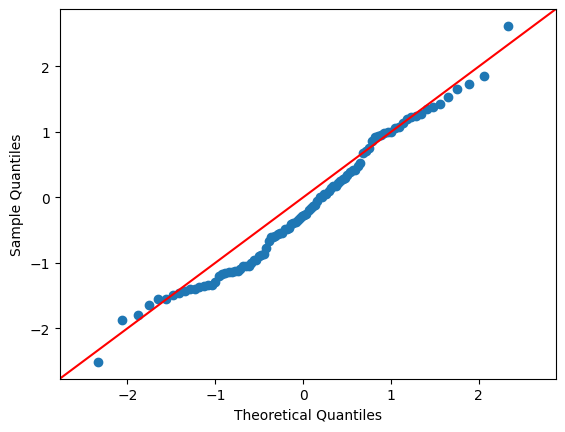

In [18]:
import numpy as np
import statsmodels.api as sm
import pylab as py
  
# Generate 100 samples from a standard normal (Z) distribution
sample_data1 = np.random.normal(0, 1, 100)
sm.qqplot(sample_data1, line ='45')

py.show()

\[ I have not figured out how to resolve the warning. If someone does, please let me know\]

In the above code see what happens when you increase the number of samples to 1000 and then to 10000. 

Next we generate sample from an Exponential distribution  with rate $\lambda =1 $  and get the Q-Q plot. 

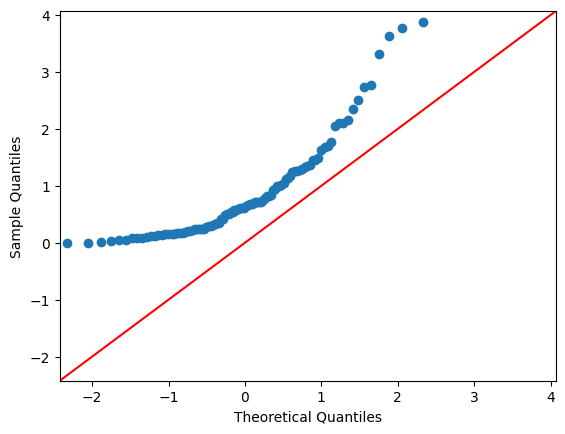

In [19]:
# Generate 100 samples from an exponential distribution with rate $\lambda =1 $
sample_data1 = np.random.exponential(1, 100)
sm.qqplot(sample_data1, line ='45')
py.show()

### 7.2 Q-Q Plot with 2 Samples 

qqplot_2samples gives the Q-Q plots for the quantiles derived from two data sets. We will consider the size of both samples to be the same althougth it is not required. In following code see what happens as you increase the number of samples

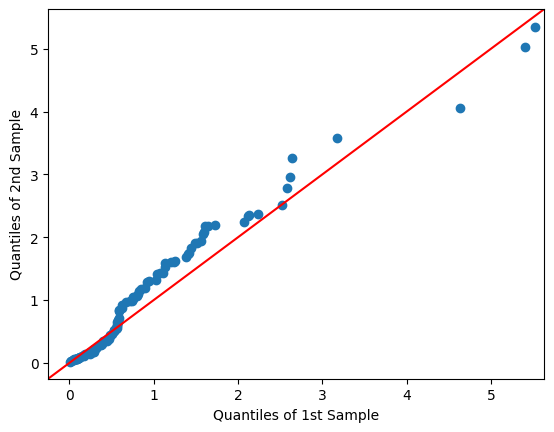

In [25]:
# Generate 100 samples from an exponential distribution with rate $\lambda =1 $
sample_data1 = np.random.exponential(1, 100)
# Generate another 100 samples from the  exponential distribution with rate $\lambda =1 $
sample_data2 = np.random.exponential(1, 100)
sm.qqplot_2samples(sample_data1, sample_data2, line ='45')
py.show()

### 7.3 A Simple Task

For this project, using the qqplot_2samples, get the Q-Q plot of the inter-packet delays generated in Section 4.5 with that of the baseline. Use only the inter-packet delays that contain the the secret message. Use the same number of inter-packet delays from the baseline traffic. 

Include the code and that will generate the plot. 

189 189


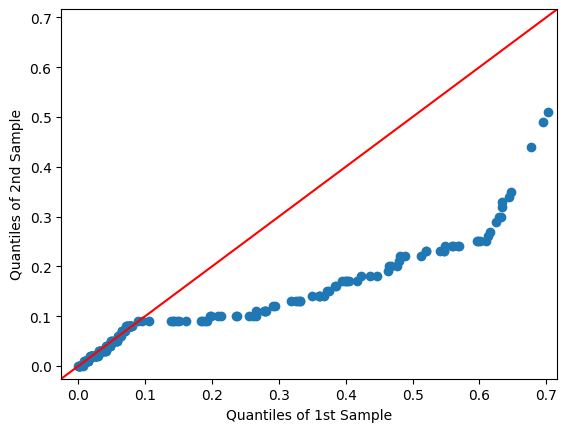

In [26]:
import numpy as np
import statsmodels.api as sm
import pylab as py
import pandas as pd
from pathlib import Path

# We need to use qqplot to plot the quantiles for the inter-packet delays generated in 4.5 with that of the baseline
# First, let's create functions to obtain these datapoints.

def get_baseline_ipds(file_path):
    traffic_data = pd.read_csv(file_path)
    traffic_data["Inter-Packet Delay"] = traffic_data["Time"].diff().round(decimals=2)
    traffic_data["Inter-Packet Delay"] = traffic_data["Inter-Packet Delay"].fillna(0)
    return traffic_data["Inter-Packet Delay"]
    
file_path = Path("Data/Traffic_data_orig.csv")
encoded_msg_path = Path("Proj_Files/secret_message_bits.txt")
covert_ipds = create_better_mod_scheme(file_path, encoded_msg_path)
baseline_ipds = get_baseline_ipds(file_path)[:len(covert_ipds)]
print(len(baseline_ipds), len(covert_ipds))
# Once we obtain the IPDs, we can use qqplot!

sm.qqplot_2samples(covert_ipds, baseline_ipds, line ='45')
plt.savefig("Proj_Files/qqplot.jpeg")

![Alt Text](Proj_Files/qqplot.jpeg)

### 8 Implemention in the Simpy Framework

***This is an extra credit step***

In this part I would like you to implement the system described in Section 5 (A Real Implementation) 
in the Simpy framework. (If you already did so for Section 5, then you do not need to do this and
you will automatically get the extra credit)

### The Main Idea

1. Implement the source as a process (**Source Process**). 
    a. Inter-packet delay distribution with mean inter-packet delay of 1 second
    b. We should be able to change the distribution

2. Implement the sender as a process (**Sender Process**). It takes mutiple parameters 
    a. The secret message 
    b. The encoding scheme to generate delays for the secret message bits 
    c. The initial packets to buffer before starting to send the message 
    d. Schedule the departure of the packets 
    e. The transmission time of each packet is fixed say 0.2 seconds
    f. Buffer size that corresponds to overflow

3. A process that generates secret message (**SMessage Process**)
    a. Generates a secret message (sequence of 0's and 1's) of some size
    b. Let's the sender know that a secret message is ready to be sent
    c. Interrupted by the **Sender Process** and imformed of  the outcome (if the secret message 
       was successfully sent or if it failed due  to overflow or underflow
    d. Waits for a delay (say 2 seconds) to generate the next secret message 
    
4. The buffer which can be implemented as part of the Sender Process. There is no limit on the buffer size

The communication between **Source Process** and the **Sender Process** is through interrupts as 
in the M/M/1 queue. 

The communication between **SMessage Process** and the **Sender Process** can be through a shared variable. 
Everytime the sender completes sending a source packet it checks if there is a  secret message ready 
to be sent.  When the **Sender Process** finishes it interrupts the **SMessage Process**. 

### Some Notes 

1. Make sure you finish everything  else before you get to this 

2. Make sure you understand the M/M/1 queue implementation

3. Have a clear picture in your mind before you start to code this

4. If you need to make any other assumption, please note it down


I tried to implement the extra credit, but was unable to do so. My goal was to use the three processes in this manner:

* I implemented the **SourceProcess** class, which is supposed to generate packets based on a given distribution (that is passed in). As soon as $i$ pckts are created, it alerts the SenderProcess
* The **SenderProcess** class is supposed to service the packets and then check whether the system overflowed, underflowed, or was successful at every step. If so, the result is sent to the SMessageProcess
* The **SMessageProcess** class creates the secret message and stores the result of each simulation in an array
* Finally, in the main method, every simulation's result is supposed to be tracked in a dataframe and printed

In [22]:
from enum import Enum
from scipy.stats import norm
import random
import simpy
import numpy as np
import pandas as pd

class G:
    RANDOM_SEED = 33
    SIM_TIME = 10
    LONG_SLEEP_TIMER = 1000000000
class Distribution(Enum):
    UNIF = 1
    NORM = 2
    EXPO = 3
# 1. Source Process
class SourceProcess:
    def __init__(self, env, distribution_type, sender_process, B):
        self.sender_process = sender_process
        self.distribution_type = distribution_type
        self.env = env
        self.action = env.process(self.run())
        self.B = B
    def run(self):
        """Runs the source process"""
        while True:
            if self.distribution_type == Distribution.EXPO:
                yield self.env.timeout(random.expovariate(1))
            elif self.distribution_type == Distribution.UNIF:
                yield self.env.timeout(random.uniform(0, 2))
            else:
                yield self.env.timeout(norm.rvs())
            #create and enque new packet
            # print(f"Number of Packets: {self.sender_process.num_pckts_in_system}")
            while self.sender_process.num_pckts_in_system != self.sender_process.i:
                self.sender_process.num_pckts_in_system += 1 # Increase the total number of pckts in the system
            if not self.sender_process.server_busy: # If the server is idle, then interrupt it
                self.sender_process.server_busy = True
                self.sender_process.action.interrupt()
class SenderProcess:
    def __init__(self, env, i, B, secret_msg_process):
        self.i = i
        self.count = 0
        self.env = env
        self.B = B
        self.num_pckts_in_system = 0
        self.server_busy = False
        self.action = env.process(self.run())
        self.secret_msg_process = secret_msg_process
    def check_underflow(self):
        return self.num_pckts_in_system < 0
    def check_overflow(self):
        return self.num_pckts_in_system > self.B
    def check_success(self):
        return self.count == len(self.secret_msg_process.secret_msg)
    def run(self):
        """Runs the server process"""
        while True:
            try:
                yield self.env.timeout(G.LONG_SLEEP_TIMER)
            except simpy.Interrupt:
                # print("in here")
                self.num_pckts_in_system -= 1
                self.count += 1
                yield self.env.timeout(0.2)
                if self.check_underflow():
                    self.secret_msg_process.handle_result("Underflow")
                    print("Underflow")
                    self.secret_msg_process.action.interrupt()
                if self.check_overflow():
                    self.secret_msg_process.handle_result("Overflow")
                    print("Overflow")
                    self.secret_msg_process.action.interrupt()
                if self.check_success():
                    self.secret_msg_process.handle_result("Success")
                    print("Success")
                    self.secret_msg_process.action.interrupt()
                self.server_busy = False
            
class SMessageProcess:
    def __init__(self, env, secret_msg_len):
        self.env = env
        self.secret_msg = self.create_secret_msg(secret_msg_len)
        self.action = env.process(self.run())
        self.results = []
    def handle_result(self, result):
        self.results.append(result)
    def create_secret_msg(self, secret_msg_len):
        secret_msg = ""
        for i in range(secret_msg_len):
            secret_msg += str(random.randint(0, 1))
        return secret_msg
    def run(self):
        while True:
            try:
                yield self.env.timeout(G.LONG_SLEEP_TIMER)
            except simpy.Interrupt:
                yield self.env.timeout(2)
            self.num_pckts_in_system = 0
            self.secret_msg = self.create_secret_msg(secret_msg_len)
def main():
    random.seed(G.RANDOM_SEED)
    msg_and_i_sizes = {16: [2, 6], 
                       32: [2, 6]}
    dict_of_data = {"Message Length": [],
                    "i": [],
                    "Overflow %": [],
                    "Underflow %": [],
                    "Success %": []
                   }
    for msg_len, list_of_is in msg_and_i_sizes.items():
        for i in list_of_is:
            env = simpy.Environment()
            distribution_type = Distribution.UNIF
            secret_msg_process = SMessageProcess(env=env,
                                                 secret_msg_len=msg_len)
            server_process = SenderProcess(env=env, 
                                           i=i, 
                                           B=20, 
                                           secret_msg_process=secret_msg_process)
            arrival_process = SourceProcess(env=env, 
                                            distribution_type=distribution_type, 
                                            sender_process=server_process, 
                                            B=20)
            env.run(until=G.SIM_TIME)
            
    
if __name__ == '__main__': main()

## 9 Submission and Grading Guidelines

For this project  there is one input file and some input figures (the drawings). You will write code  which will generate results and figures. 

1. Put this jupyter notebook, the input file, and the result figures you generaye in one folder. Make sure that paths are set properly and  the figures will render when I open the notebook. 

2. Submit a zipfile of the folder. 

3. There will be interactive grading. 